In [1]:
import pandas as pd
import numpy as np
import tqdm
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.ticker as ticker

from mrmr import mrmr_classif

import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 500)

In [2]:
# Read the csv file:
df=pd.read_csv('player_stats.csv', sep=',', encoding='latin-1')
df_1 = df.copy()
df

,player,country,height,weight,age,club,ball_control,dribbling,marking,slide_tackle,stand_tackle,aggression,reactions,att_position,interceptions,vision,composure,crossing,short_pass,long_pass,acceleration,stamina,strength,balance,sprint_speed,agility,jumping,heading,shot_power,finishing,long_shots,curve,fk_acc,penalties,volleys,gk_positioning,gk_diving,gk_handling,gk_kicking,gk_reflexes,value
0,Cristian Castro Devenish,Colombia,192,84,22,Atl. Nacional,55,43,NaN,68,73,72,68,30,65,30,50,33,64,49,41,55,86,40,52,43,51,64,54,30,31,32,34,41,33,10,11,6,7,9,$1.400.000
1,Silaldo Taffarel,Brazil,181,80,31,Corinthians,69,70,NaN,56,58,62,70,69,70,64,54,60,63,63,64,87,81,42,67,65,65,54,60,64,68,65,62,48,46,12,15,14,8,14,$975.00
2,Thomas DÃ¤hne,Germany,193,84,29,Holstein Kiel,25,12,NaN,13,16,27,65,17,20,49,48,14,35,18,46,38,68,41,48,36,60,17,51,14,20,20,15,26,16,64,74,65,68,74,$1.100.000
3,Michael Sollbauer,Austria,187,86,33,SK Rapid Wien,46,48,NaN,66,69,71,64,48,66,29,70,44,58,53,35,73,82,56,63,57,80,67,32,24,33,25,13,22,19,10,10,8,14,9,$650.00
4,Diego Segovia,Uruguay,191,80,23,Independiente,14,8,NaN,14,16,28,50,10,12,38,34,11,23,20,38,28,64,24,31,34,27,13,48,4,6,9,10,16,5,61,59,62,64,64,$300.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5675,Karim Benzema,France,185,81,35,Real Madrid,91,87,None,18,24,63,92,92,39,89,90,75,89,76,79,82,82,72,80,78,79,90,87,92,80,82,73,84,88,5,13,11,5,7,$64.000.000
5676,Mohamed Salah,Egypt,175,71,31,Liverpool,86,88,None,41,43,63,92,91,55,84,90,80,84,77,89,87,76,91,89,89,69,59,82,92,84,84,69,86,83,11,14,14,9,14,$99.500.000
5677,Neymar Jr,Brazil,175,68,31,Paris SG,94,95,None,29,32,63,88,86,37,90,93,83,85,81,88,79,52,82,86,93,62,63,79,83,81,88,87,91,86,15,9,9,15,11,$99.500.000
5678,Cristiano Ronaldo,Portugal,187,83,38,Al Nassr,87,81,None,24,32,62,90,93,29,76,94,78,78,70,76,70,75,67,82,77,95,89,93,91,88,79,75,90,85,14,7,11,15,11,$31.000.000


In [3]:
# Check for duplicates:
df_1.duplicated().sum()

0

In [4]:
# Check for NaNs:
sum_of_na = df_1.isna().sum().sum()
print("Sum of missing values:", sum_of_na)
# drop NaNs:
df_1.dropna(inplace=True)

Sum of missing values: 158


In [5]:
df_1.shape

(5522, 41)

In [6]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5522 entries, 158 to 5679
Data columns (total 41 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   player          5522 non-null   object
 1   country         5522 non-null   object
 2   height          5522 non-null   int64 
 3   weight          5522 non-null   int64 
 4   age             5522 non-null   int64 
 5   club            5522 non-null   object
 6   ball_control    5522 non-null   int64 
 7   dribbling       5522 non-null   int64 
 8   marking         5522 non-null   object
 9   slide_tackle    5522 non-null   int64 
 10  stand_tackle    5522 non-null   int64 
 11  aggression      5522 non-null   int64 
 12  reactions       5522 non-null   int64 
 13  att_position    5522 non-null   int64 
 14  interceptions   5522 non-null   int64 
 15  vision          5522 non-null   int64 
 16  composure       5522 non-null   int64 
 17  crossing        5522 non-null   int64 
 18  short_

In [7]:
df_1['marking'].unique()
df_1.drop(columns='marking',inplace=True)
df_1

,player,country,height,weight,age,club,ball_control,dribbling,slide_tackle,stand_tackle,aggression,reactions,att_position,interceptions,vision,composure,crossing,short_pass,long_pass,acceleration,stamina,strength,balance,sprint_speed,agility,jumping,heading,shot_power,finishing,long_shots,curve,fk_acc,penalties,volleys,gk_positioning,gk_diving,gk_handling,gk_kicking,gk_reflexes,value
158,Maxime CrÃ©peau,Canada,180,88,29,LAFC,45,19,17,17,34,78,7,20,55,60,19,34,46,50,33,69,40,48,43,67,14,53,17,14,16,14,23,19,70,72,70,70,75,$2.200.000
159,Stefan Thesker,Germany,190,84,32,Holstein Kiel,55,45,64,70,69,54,38,69,37,60,42,57,68,43,63,78,45,54,50,66,71,58,29,39,33,31,42,40,14,13,7,10,12,$700.00
160,Cameron John,England,181,78,24,Rochdale,55,53,57,60,61,58,45,59,44,56,47,58,53,70,65,70,62,75,68,75,55,42,29,36,34,25,32,28,8,13,9,7,8,$350.00
161,Vinicius Cardenha,Brazil,179,73,31,Fluminense,62,71,71,75,72,74,42,71,45,73,74,68,52,65,79,65,68,79,70,71,67,46,52,42,54,46,67,43,12,16,13,10,8,$3.600.000
162,Danisco Fachini,Brazil,169,68,35,Flamengo,71,66,72,74,71,74,38,84,55,74,55,78,76,68,79,64,77,65,63,76,67,76,19,71,48,69,60,12,6,11,14,9,6,$1.900.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5675,Karim Benzema,France,185,81,35,Real Madrid,91,87,18,24,63,92,92,39,89,90,75,89,76,79,82,82,72,80,78,79,90,87,92,80,82,73,84,88,5,13,11,5,7,$64.000.000
5676,Mohamed Salah,Egypt,175,71,31,Liverpool,86,88,41,43,63,92,91,55,84,90,80,84,77,89,87,76,91,89,89,69,59,82,92,84,84,69,86,83,11,14,14,9,14,$99.500.000
5677,Neymar Jr,Brazil,175,68,31,Paris SG,94,95,29,32,63,88,86,37,90,93,83,85,81,88,79,52,82,86,93,62,63,79,83,81,88,87,91,86,15,9,9,15,11,$99.500.000
5678,Cristiano Ronaldo,Portugal,187,83,38,Al Nassr,87,81,24,32,62,90,93,29,76,94,78,78,70,76,70,75,67,82,77,95,89,93,91,88,79,75,90,85,14,7,11,15,11,$31.000.000


In [8]:
df_1.replace('[\$,]', '', regex=True,inplace=True )
df_1.replace('[\.,]', '', regex=True)
df_1['value'] = df_1['value'].str.replace('.', '').astype(float)
df_1['value']=pd.to_numeric(df_1['value'])

In [9]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5522 entries, 158 to 5679
Data columns (total 40 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   player          5522 non-null   object 
 1   country         5522 non-null   object 
 2   height          5522 non-null   int64  
 3   weight          5522 non-null   int64  
 4   age             5522 non-null   int64  
 5   club            5522 non-null   object 
 6   ball_control    5522 non-null   int64  
 7   dribbling       5522 non-null   int64  
 8   slide_tackle    5522 non-null   int64  
 9   stand_tackle    5522 non-null   int64  
 10  aggression      5522 non-null   int64  
 11  reactions       5522 non-null   int64  
 12  att_position    5522 non-null   int64  
 13  interceptions   5522 non-null   int64  
 14  vision          5522 non-null   int64  
 15  composure       5522 non-null   int64  
 16  crossing        5522 non-null   int64  
 17  short_pass      5522 non-null  

In [10]:
df_1.drop(columns=['player','country','club'],inplace=True)

In [11]:
df_1

,height,weight,age,ball_control,dribbling,slide_tackle,stand_tackle,aggression,reactions,att_position,interceptions,vision,composure,crossing,short_pass,long_pass,acceleration,stamina,strength,balance,sprint_speed,agility,jumping,heading,shot_power,finishing,long_shots,curve,fk_acc,penalties,volleys,gk_positioning,gk_diving,gk_handling,gk_kicking,gk_reflexes,value
158,180,88,29,45,19,17,17,34,78,7,20,55,60,19,34,46,50,33,69,40,48,43,67,14,53,17,14,16,14,23,19,70,72,70,70,75,2200000.0
159,190,84,32,55,45,64,70,69,54,38,69,37,60,42,57,68,43,63,78,45,54,50,66,71,58,29,39,33,31,42,40,14,13,7,10,12,70000.0
160,181,78,24,55,53,57,60,61,58,45,59,44,56,47,58,53,70,65,70,62,75,68,75,55,42,29,36,34,25,32,28,8,13,9,7,8,35000.0
161,179,73,31,62,71,71,75,72,74,42,71,45,73,74,68,52,65,79,65,68,79,70,71,67,46,52,42,54,46,67,43,12,16,13,10,8,3600000.0
162,169,68,35,71,66,72,74,71,74,38,84,55,74,55,78,76,68,79,64,77,65,63,76,67,76,19,71,48,69,60,12,6,11,14,9,6,1900000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5675,185,81,35,91,87,18,24,63,92,92,39,89,90,75,89,76,79,82,82,72,80,78,79,90,87,92,80,82,73,84,88,5,13,11,5,7,64000000.0
5676,175,71,31,86,88,41,43,63,92,91,55,84,90,80,84,77,89,87,76,91,89,89,69,59,82,92,84,84,69,86,83,11,14,14,9,14,99500000.0
5677,175,68,31,94,95,29,32,63,88,86,37,90,93,83,85,81,88,79,52,82,86,93,62,63,79,83,81,88,87,91,86,15,9,9,15,11,99500000.0
5678,187,83,38,87,81,24,32,62,90,93,29,76,94,78,78,70,76,70,75,67,82,77,95,89,93,91,88,79,75,90,85,14,7,11,15,11,31000000.0


In [12]:
X=df_1.drop(columns='value')
y=df_1['value']

In [13]:
X

,height,weight,age,ball_control,dribbling,slide_tackle,stand_tackle,aggression,reactions,att_position,interceptions,vision,composure,crossing,short_pass,long_pass,acceleration,stamina,strength,balance,sprint_speed,agility,jumping,heading,shot_power,finishing,long_shots,curve,fk_acc,penalties,volleys,gk_positioning,gk_diving,gk_handling,gk_kicking,gk_reflexes
158,180,88,29,45,19,17,17,34,78,7,20,55,60,19,34,46,50,33,69,40,48,43,67,14,53,17,14,16,14,23,19,70,72,70,70,75
159,190,84,32,55,45,64,70,69,54,38,69,37,60,42,57,68,43,63,78,45,54,50,66,71,58,29,39,33,31,42,40,14,13,7,10,12
160,181,78,24,55,53,57,60,61,58,45,59,44,56,47,58,53,70,65,70,62,75,68,75,55,42,29,36,34,25,32,28,8,13,9,7,8
161,179,73,31,62,71,71,75,72,74,42,71,45,73,74,68,52,65,79,65,68,79,70,71,67,46,52,42,54,46,67,43,12,16,13,10,8
162,169,68,35,71,66,72,74,71,74,38,84,55,74,55,78,76,68,79,64,77,65,63,76,67,76,19,71,48,69,60,12,6,11,14,9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5675,185,81,35,91,87,18,24,63,92,92,39,89,90,75,89,76,79,82,82,72,80,78,79,90,87,92,80,82,73,84,88,5,13,11,5,7
5676,175,71,31,86,88,41,43,63,92,91,55,84,90,80,84,77,89,87,76,91,89,89,69,59,82,92,84,84,69,86,83,11,14,14,9,14
5677,175,68,31,94,95,29,32,63,88,86,37,90,93,83,85,81,88,79,52,82,86,93,62,63,79,83,81,88,87,91,86,15,9,9,15,11
5678,187,83,38,87,81,24,32,62,90,93,29,76,94,78,78,70,76,70,75,67,82,77,95,89,93,91,88,79,75,90,85,14,7,11,15,11


In [14]:
y

158      2200000.0
159        70000.0
160        35000.0
161      3600000.0
162      1900000.0
           ...    
5675    64000000.0
5676    99500000.0
5677    99500000.0
5678    31000000.0
5679    10500000.0
Name: value, Length: 5522, dtype: float64

In [15]:
# X_train, X_test, y_train, y_test are the resulting training and testing sets:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state = 13)

### Utilizing scaling to help the score

In [16]:
scaler=StandardScaler()

In [17]:
X_train_sc =scaler.fit_transform(X_train)
X_test_sc =scaler.transform(X_test)

#### Logistic Regression

In [18]:
LR = LogisticRegression()

In [19]:
LR.fit(X_train_sc ,y_train)

LogisticRegression()

In [20]:
y_pred=LR.predict(X_test_sc)

In [21]:
print(f"R2 Score:",r2_score(y_test, y_pred))

R2 Score: 0.40042755980596756


In [22]:
print(f'MSE:' ,mean_squared_error(y_test, y_pred,squared=False))

MSE: 5830271.09376007


#### LinearRegresion

In [23]:
Linear_R=LinearRegression()

In [24]:
Linear_R.fit(X_train_sc,y_train)

LinearRegression()

In [25]:
y_pred_Linear_R = Linear_R.predict(X_test_sc)

In [26]:
print(f"R2 Score:" , r2_score(y_test, y_pred_Linear_R))

R2 Score: 0.33413827395722095


In [27]:
print(f'MSE:' , mean_squared_error(y_test, y_pred_Linear_R,squared=False))

MSE: 6144123.60426039


#### ElasticNet

In [28]:
elastic_net=ElasticNet()

In [29]:
elastic_net.fit(X_train_sc,y_train)

ElasticNet()

In [30]:
y_pred_el_net=elastic_net.predict(X_test_sc)

In [31]:
print(f"R2 Score:" ,r2_score(y_test, y_pred_el_net))

R2 Score: 0.3002545683958926


In [32]:
print(f'MSE:' ,mean_squared_error(y_test, y_pred_el_net,squared=False))

MSE: 6298511.893972323


#### DecisionTreeRegressor

In [33]:
Decision_tree=DecisionTreeRegressor(max_depth=21,random_state=10)

In [34]:
Decision_tree.fit(X_train_sc,y_train)

DecisionTreeRegressor(max_depth=21, random_state=10)

In [35]:
y_pred_Decision_tree=Decision_tree.predict(X_test_sc)

In [36]:
print(f"R2 Score:" ,r2_score(y_test, y_pred_Decision_tree))

R2 Score: 0.7351021018192518


In [37]:
print(f'MSE:' ,mean_squared_error(y_test, y_pred_Decision_tree,squared=False))

MSE: 3875316.4703501835


In [38]:
pd.DataFrame(mrmr_classif(X,y, K=10))

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 33.96it/s]


,0
0,reactions
1,height
2,composure
3,shot_power
4,short_pass
5,vision
6,ball_control
7,long_pass
8,age
9,stamina


#### Ridge

In [39]:
ridge_=Ridge()

In [40]:
ridge_.fit(X_train_sc,y_train)

Ridge()

In [41]:
y_pred_Ridge=ridge_.predict(X_test_sc)

In [42]:
print(f"R2 Score:" ,r2_score(y_test, y_pred_Ridge))

R2 Score: 0.33416278441633274


In [43]:
print(f'MSE:' ,mean_squared_error(y_test, y_pred_Ridge,squared=False))

MSE: 6144010.520214277


### Model Selection and Evaluation Procedure

In [44]:
models=[
    LR,Linear_R,elastic_net,Decision_tree,ridge_
]

In [45]:
scorer =0
name=None
final_pred=None
pred=None
for model in models:
    parameters={} # Define parameters for grid search
    CV = GridSearchCV(model,parameters)
    CV.fit(X_train_sc,y_train)
    pred=CV.predict(X_test_sc)
    
    # Update best model if current model has a better score
    if scorer <r2_score(y_test, pred):
        scorer =r2_score(y_test, pred)
        name=model
        final_pred=pred


print(f'Final Prediction:', final_pred)
print("\n") 
print(f'Best Model:', name)
print("\n") 
print(f'Best R2 Score:', scorer)
print("\n") 
print(f'MSE:', mean_squared_error(y_test, final_pred,squared=False))

Final Prediction: [   4000.           15908.15972222 1200000.         ...   71850.
   81911.76470588   15908.15972222]


Best Model: DecisionTreeRegressor(max_depth=21, random_state=10)


Best R2 Score: 0.7351021018192518


MSE: 3875316.4703501835


### =====================================================================================

### Insights from the Dataset

In [46]:
df_2 = df.copy()
df_2.dropna(inplace = True)
df_2.shape

(5522, 41)

In [47]:
df_2= df_2.replace('[\$,]', '', regex=True)
df_2=df_2.replace('[\.,]', '', regex=True)
df_2['value']=pd.to_numeric(df_2['value'])

#### Most Valuable Players

In [48]:
player_value =df_2.groupby('player')['value'].sum().sort_values(ascending =False).reset_index().head(10)

In [49]:
player_value = player_value.replace('[\Ã©,]', 'e', regex=True)

In [50]:
player_value

,player,value
0,Kylian Mbappee,153500000
1,Erling Haaland,123000000
2,Kevin De Bruyne,107500000
3,Sadio Manee,101000000
4,Mohamed Salah,99500000
5,Neymar Jr,99500000
6,Joshua Kimmich,97000000
7,Virgil van Dijk,84500000
8,Lautaro Marte­nez,79500000
9,Gianluigi Donnarumma,78000000


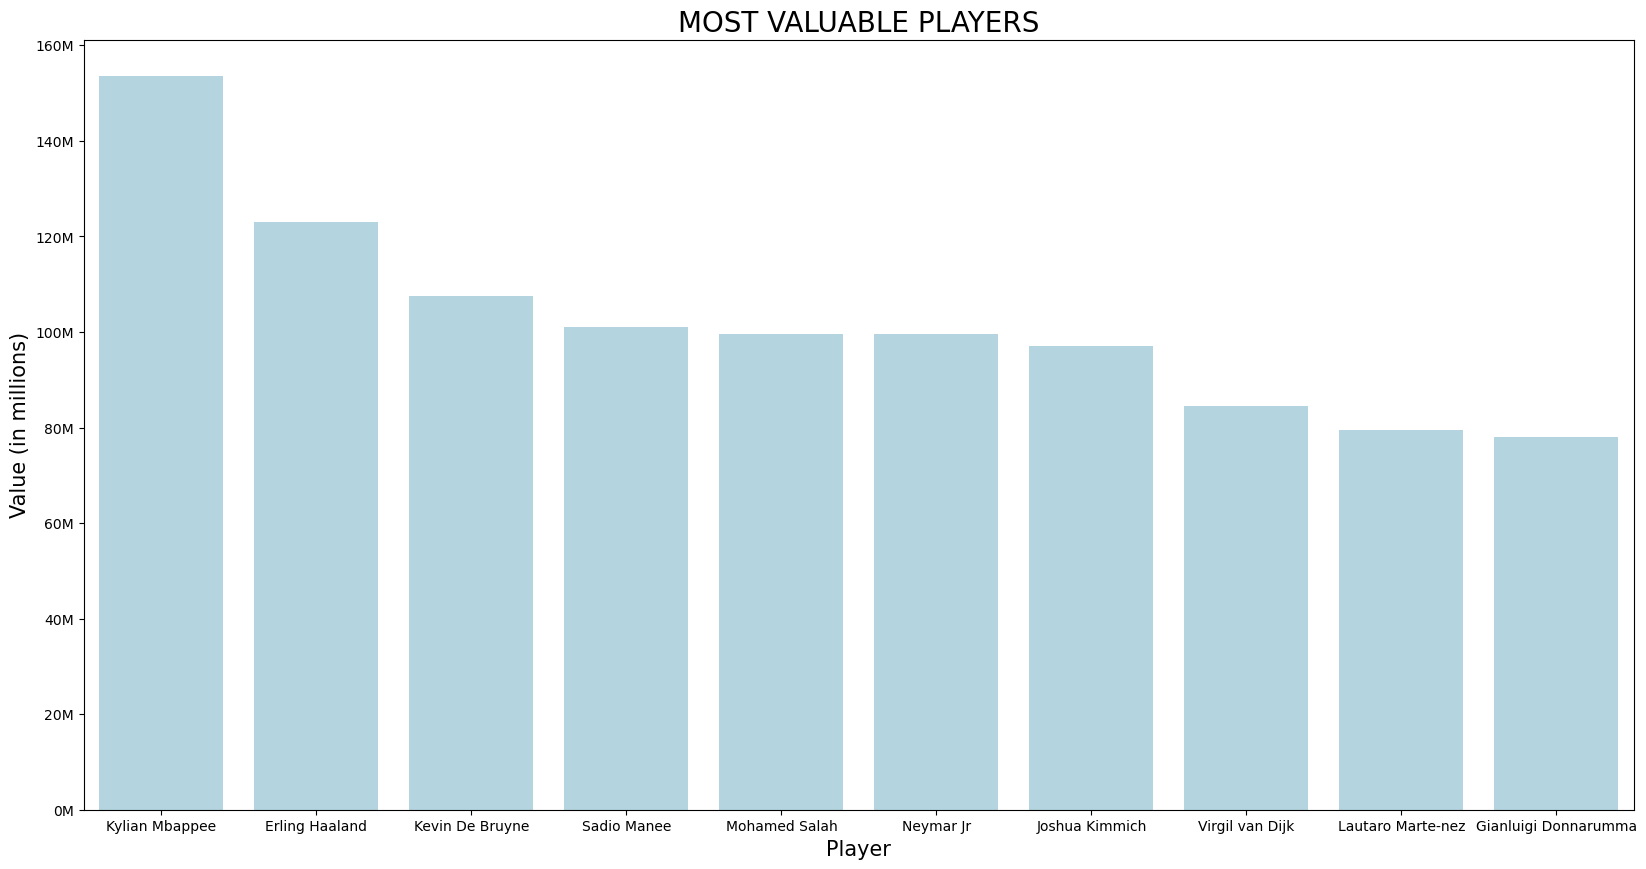

In [51]:
fig, ax = plt.subplots(figsize=(20, 10)) 
sns.barplot(x='player', y='value', data=player_value, ax=ax, color="lightblue")

# Customize the plot
ax.set_title('MOST VALUABLE PLAYERS', fontsize=20)
ax.set_xlabel('Player', fontsize=15)
ax.set_ylabel('Value (in millions)', fontsize=15)

# Format y-axis labels to display values in millions
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x/1000000:.0f}M'))

plt.show()

#### Most Valuable Countries

In [52]:
countries=df_2.groupby('country')['value'].sum().sort_values(ascending=False).reset_index().head(10)
pd.options.display.float_format = '{:.2f}'.format
countries

,country,value
0,Spain,1411368500
1,Brazil,1153113500
2,France,1028984500
3,England,864046100
4,Germany,789606500
5,Argentina,779125000
6,Italy,689078000
7,Portugal,621366500
8,Netherlands,481704500
9,Belgium,419565000


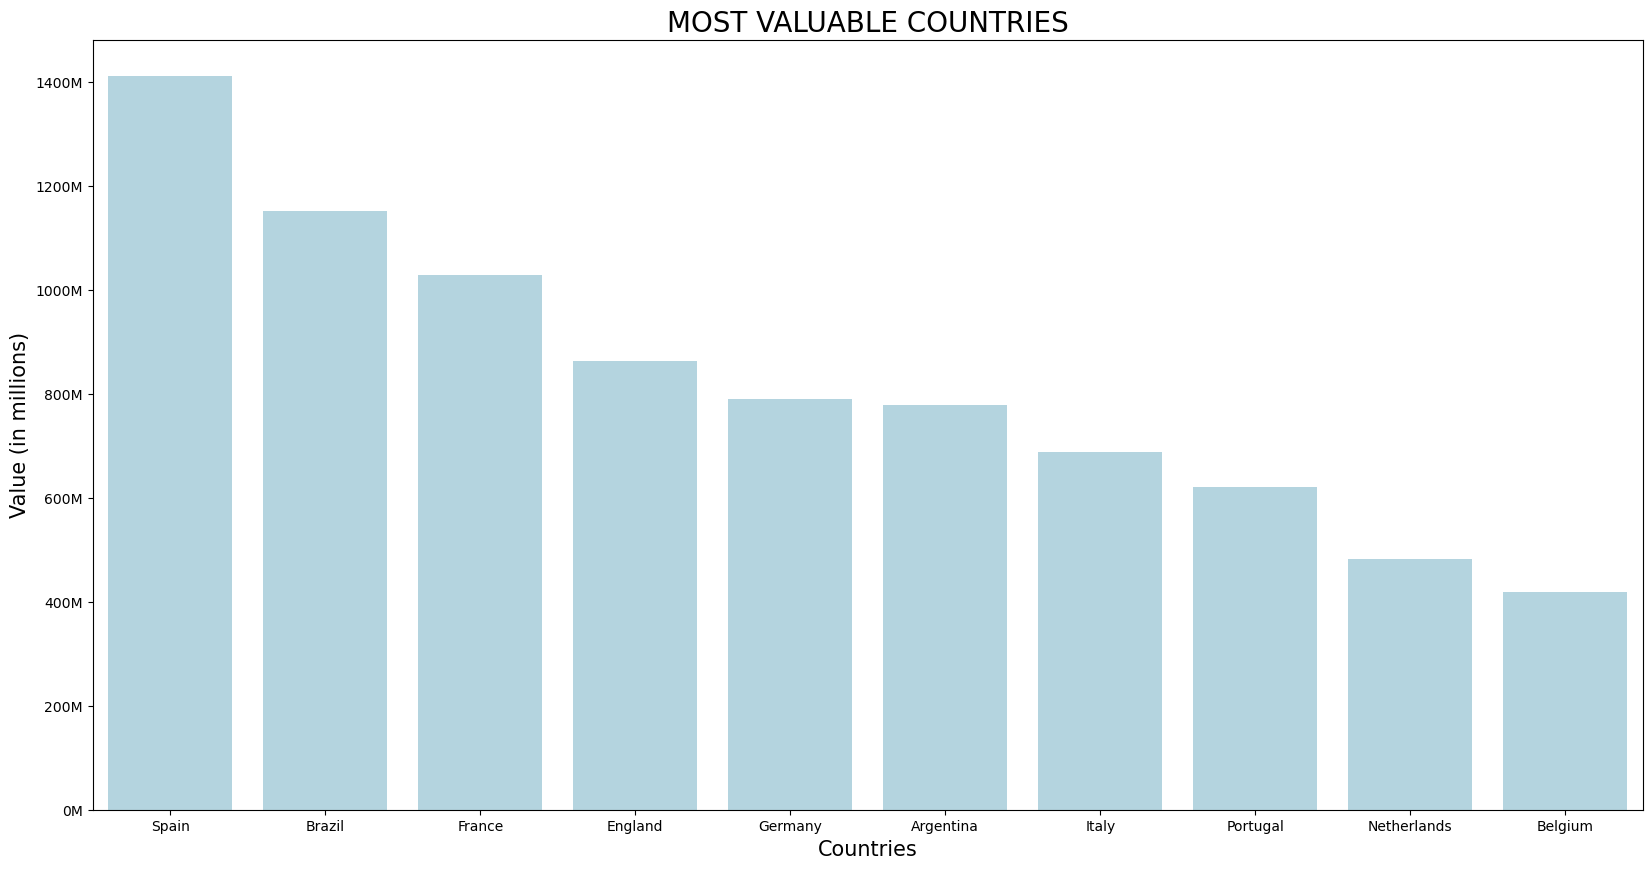

In [53]:
fig, ax = plt.subplots(figsize=(20, 10)) 
sns.barplot(x='country', y='value', data=countries, ax=ax, color="lightblue")

# Customize the plot
ax.set_title('MOST VALUABLE COUNTRIES', fontsize=20)
ax.set_xlabel('Countries', fontsize=15)
ax.set_ylabel('Value (in millions)', fontsize=15)

# Format y-axis labels to display values in millions
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x/1000000:.0f}M'))

plt.show()

#### Most Valuable Teams

In [54]:
teams=df_2.groupby('club')['value'].sum().sort_values(ascending=False).reset_index().head(10)

In [55]:
teams

,club,value
0,Manchester City,427033500
1,FC Bayern MÃ¼nchen,409543000
2,Paris SG,400725000
3,Manchester Utd,348327500
4,Liverpool,314188500
5,Arsenal,273935500
6,Brazil,215000000
7,AtlÃ©tico de Madrid,197750000
8,FC Barcelona,186345000
9,Juventus,178667500


In [56]:
teams['club'] = teams['club'].str.replace('FC Bayern MÃ¼nchen', 'FC Bayern München')
teams['club'] = teams['club'].str.replace('AtlÃ©tico de Madrid', 'Atlético de Madrid')
teams

,club,value
0,Manchester City,427033500
1,FC Bayern München,409543000
2,Paris SG,400725000
3,Manchester Utd,348327500
4,Liverpool,314188500
5,Arsenal,273935500
6,Brazil,215000000
7,Atlético de Madrid,197750000
8,FC Barcelona,186345000
9,Juventus,178667500


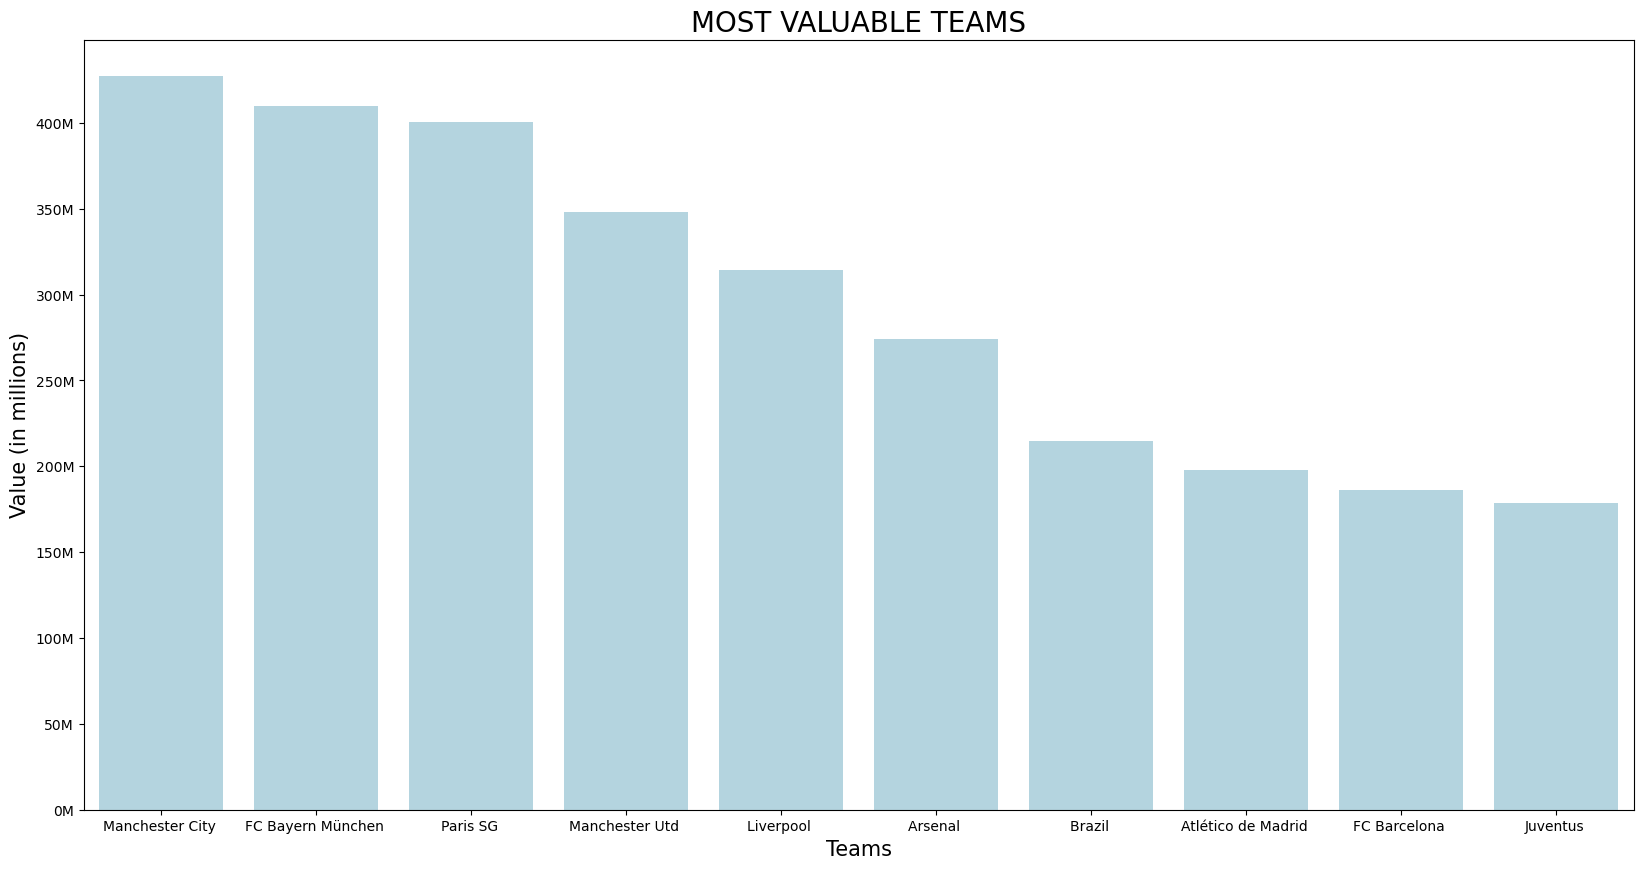

In [57]:
fig, ax = plt.subplots(figsize=(20, 10)) 
sns.barplot(x='club', y='value', data=teams, ax=ax, color="lightblue")

# Customize the plot
ax.set_title('MOST VALUABLE TEAMS', fontsize=20)
ax.set_xlabel('Teams', fontsize=15)
ax.set_ylabel('Value (in millions)', fontsize=15)

# Format y-axis labels to display values in millions
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x/1000000:.0f}M'))

plt.show()